# Plot distribution from GPU-Z Monitoring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_gpu = pd.read_csv("/home/utente/cernbox/Synched/Archivio_cronologico/Febbraio_2025/GPU-Z_Sensor_Log.txt") 
df_gpu.head()

,Date,GPU Clock [MHz],Memory Clock [MHz],GPU Temperature [C],Hot Spot [C],Memory Temperature [C],Fan 1 Speed (%) [%],Fan 1 Speed (RPM) [RPM],Fan 2 Speed (%) [%],Fan 2 Speed (RPM) [RPM],...,8-Pin #1 Power [W],8-Pin #1 Voltage [V],8-Pin #2 Power [W],8-Pin #2 Voltage [V],Power Consumption (%) [% TDP],PerfCap Reason [],GPU Voltage [V],CPU Temperature [C],System Memory Used [MB],Unnamed: 30
0,2025-02-24 12:12:08,210.0,50.6,41.5,46.8,46.0,30,998,30,999,...,14.9,12.1,15.1,12.1,10.2,16,0.756,60.9,14926,NaN
1,2025-02-24 12:12:09,210.0,50.6,41.6,46.8,46.0,30,1001,30,1001,...,14.7,12.1,14.9,12.1,10.0,16,0.756,60.4,14916,NaN
2,2025-02-24 12:12:10,210.0,50.6,41.5,47.0,46.0,30,999,30,998,...,14.8,12.1,15.0,12.1,10.1,16,0.756,60.0,14917,NaN
3,2025-02-24 12:12:11,210.0,50.6,41.4,47.2,46.0,30,1001,30,1001,...,14.8,12.1,14.9,12.1,10.1,16,0.756,59.8,14910,NaN
4,2025-02-24 12:12:12,210.0,50.6,41.5,46.8,46.0,30,999,30,1000,...,14.8,12.1,15.1,12.1,10.2,16,0.756,59.4,14921,NaN


In [3]:
df_gpu.columns

Index(['        Date        ', ' GPU Clock [MHz] ', ' Memory Clock [MHz] ',
       ' GPU Temperature [C] ', ' Hot Spot [C] ', ' Memory Temperature [C] ',
       ' Fan 1 Speed (%) [%] ', ' Fan 1 Speed (RPM) [RPM] ',
       ' Fan 2 Speed (%) [%] ', ' Fan 2 Speed (RPM) [RPM] ',
       ' Memory Used [MB] ', ' GPU Load [%] ', ' Memory Controller Load [%] ',
       ' Video Engine Load [%] ', ' Bus Interface Load [%] ',
       ' Board Power Draw [W] ', ' GPU Chip Power Draw [W] ',
       ' PWR_SRC Power Draw [W] ', ' PWR_SRC Voltage [V] ',
       ' PCIe Slot Power [W] ', ' PCIe Slot Voltage [V] ',
       ' 8-Pin #1 Power [W] ', ' 8-Pin #1 Voltage [V] ',
       ' 8-Pin #2 Power [W] ', ' 8-Pin #2 Voltage [V] ',
       ' Power Consumption (%) [% TDP] ', ' PerfCap Reason [] ',
       ' GPU Voltage [V] ', ' CPU Temperature [C] ',
       ' System Memory Used [MB] ', 'Unnamed: 30'],
      dtype='object')

## Convert the date column into datetime for plotting

In [4]:
df_gpu['        Date        '].head()

0    2025-02-24 12:12:08 
1    2025-02-24 12:12:09 
2    2025-02-24 12:12:10 
3    2025-02-24 12:12:11 
4    2025-02-24 12:12:12 
Name:         Date        , dtype: object

In [5]:
df_gpu["Date"]=pd.to_datetime(df_gpu['        Date        '],format='%Y-%m-%d %H:%M:%S')
df_gpu=df_gpu.drop('        Date        ',axis=1)

In [6]:
df_gpu.dtypes

 GPU Clock [MHz]                           object
 Memory Clock [MHz]                        object
 GPU Temperature [C]                       object
 Hot Spot [C]                              object
 Memory Temperature [C]                    object
 Fan 1 Speed (%) [%]                       object
 Fan 1 Speed (RPM) [RPM]                   object
 Fan 2 Speed (%) [%]                       object
 Fan 2 Speed (RPM) [RPM]                   object
 Memory Used [MB]                          object
 GPU Load [%]                              object
 Memory Controller Load [%]                object
 Video Engine Load [%]                     object
 Bus Interface Load [%]                    object
 Board Power Draw [W]                      object
 GPU Chip Power Draw [W]                   object
 PWR_SRC Power Draw [W]                    object
 PWR_SRC Voltage [V]                       object
 PCIe Slot Power [W]                       object
 PCIe Slot Voltage [V]                     object


## Convert float types
All data columns are still "object", due to after the crash being labelled with -
Need to replace with -

In [7]:
df_gpu.tail()

,GPU Clock [MHz],Memory Clock [MHz],GPU Temperature [C],Hot Spot [C],Memory Temperature [C],Fan 1 Speed (%) [%],Fan 1 Speed (RPM) [RPM],Fan 2 Speed (%) [%],Fan 2 Speed (RPM) [RPM],Memory Used [MB],...,8-Pin #1 Voltage [V],8-Pin #2 Power [W],8-Pin #2 Voltage [V],Power Consumption (%) [% TDP],PerfCap Reason [],GPU Voltage [V],CPU Temperature [C],System Memory Used [MB],Unnamed: 30,Date
576,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0,0.0,65.9,9762,NaN,2025-02-24 12:21:52
577,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0,0.0,65.9,9760,NaN,2025-02-24 12:21:53
578,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0,0.0,66.0,9761,NaN,2025-02-24 12:21:54
579,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0,0.0,65.9,9765,NaN,2025-02-24 12:21:55
580,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0,0.0,66.0,9756,NaN,2025-02-24 12:21:56


In [8]:
import re
df_gpu.replace(re.compile('.* - *.'),0,inplace=True)

In [9]:
#convert type object
for i, dtype in enumerate(df_gpu.dtypes):
    if (dtype == "object"):
        df_gpu.iloc[:,i] = df_gpu.iloc[:,i].astype(float)
        

/tmp/ipykernel_25453/286137132.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_gpu.iloc[:,i] = df_gpu.iloc[:,i].astype(float)


In [10]:
df_gpu.dtypes

 GPU Clock [MHz]                          float64
 Memory Clock [MHz]                       float64
 GPU Temperature [C]                      float64
 Hot Spot [C]                             float64
 Memory Temperature [C]                   float64
 Fan 1 Speed (%) [%]                      float64
 Fan 1 Speed (RPM) [RPM]                  float64
 Fan 2 Speed (%) [%]                      float64
 Fan 2 Speed (RPM) [RPM]                  float64
 Memory Used [MB]                         float64
 GPU Load [%]                             float64
 Memory Controller Load [%]               float64
 Video Engine Load [%]                    float64
 Bus Interface Load [%]                   float64
 Board Power Draw [W]                     float64
 GPU Chip Power Draw [W]                  float64
 PWR_SRC Power Draw [W]                   float64
 PWR_SRC Voltage [V]                      float64
 PCIe Slot Power [W]                      float64
 PCIe Slot Voltage [V]                    float64


## Plotting the distributions

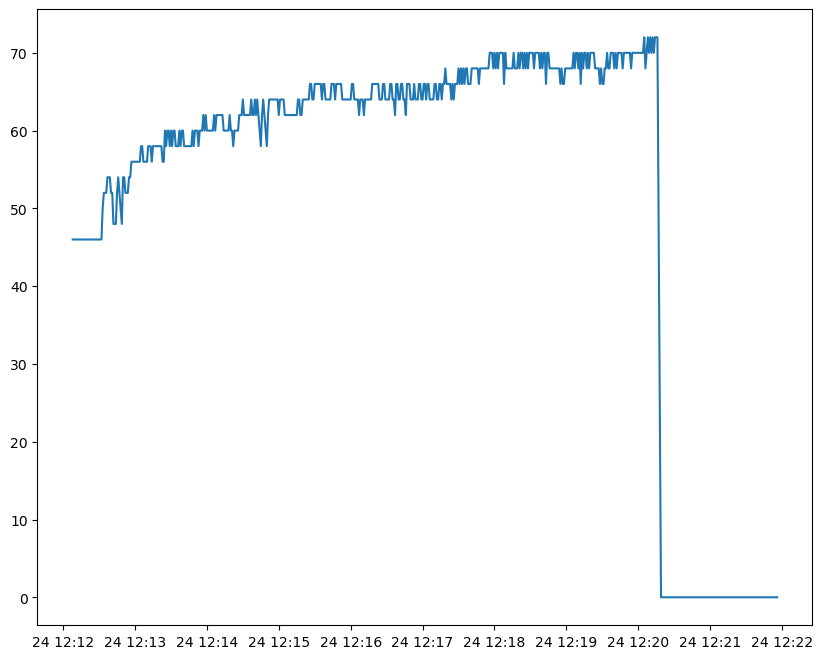

In [11]:
plt.figure(figsize=(10,8))
plt.plot(df_gpu["Date"],df_gpu[" Memory Temperature [C] "])